# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 7

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



In [ ]:
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from tqdm import tqdm



## Задача 1

Проверьте, отличается ли средний балл студентов курса Phystech@DataScience за лекгкую часть задания 3 и 5 весной 2023.

Данные возьмите из [таблицы оценок](https://docs.google.com/spreadsheets/d/1GSw2_vAMQ4XZcAf8Y_99CkJ1oi4_LrHyWIS-DCdFE0Y/edit?usp=sharing). Не забудьте визуализировать данные с помощью ядерной оценки плотности (вам поможет функция `sns.kdeplot`) и оценить сдвиг.



In [ ]:
data = pd.ExcelFile('https://docs.google.com/spreadsheets/d/1GSw2_vAMQ4XZcAf8Y_99CkJ1oi4_LrHyWIS-DCdFE0Y/export?format=xlsx')
data = data.parse('Домашние задания')
data.head()

,Unnamed: 0,Задание 1,Задание 2,Unnamed: 3,Unnamed: 4,Задание 3,Unnamed: 6,Задание 4,Unnamed: 8,Задание 5,...,Unnamed: 18,Задание 10,Unnamed: 20,Задание 11,Unnamed: 22,Задание 12,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,NaN,Сумма Л,Сумма Л,Сумма С,Контест,Сумма Л,Сумма С,Сумма Л,Сумма С,Сумма Л,...,Сумма С,Сумма Л,Сумма С,Сумма Л,Сумма С,Сумма Л,Сумма С,NaN,Сумма Л,Сумма С
1,Максимум,60,70,15,50,85,85,50,50,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455,290
2,Агапов Егор,59.5,38,15,NaN,74,35,48,48,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304.5,163
3,Алексеев Даниил,60,65,15,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125,15
4,Алехин Юрий,60,58,15,NaN,72,15,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190,30


In [ ]:
task_3 = data['Задание 3'][2:]
task_5 = data['Задание 5'][2:]
print(f'Среднее по заданию 3: {np.mean(task_3).round(4)}',
      f'Среднее по заданию 5: {np.mean(task_5).round(4)}')

Среднее по заданию 3: 39.0385 Среднее по заданию 5: 31.6834


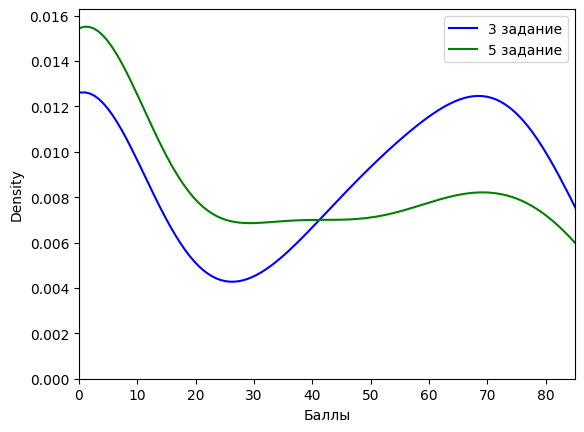

In [ ]:
sns.kdeplot(task_3, color='blue', label='3 задание')
sns.kdeplot(task_5, color='green', label='5 задание')

plt.xlim((0, 85))
plt.xlabel('Баллы')
plt.legend();

In [ ]:
t, p_value =  sps.ttest_ind(list(task_3), list(task_5))
np.abs(t) > sps.t(df=len(task_3)+len(task_5)-2).ppf(1-0.05/2) 

True

Сделайте общий вывод по задаче.

**Вывод:** По графику видно, что в 3м задании больше студентов набрало баллов в диапозоне [50, 85], чем в 5м задании. Также в 3м задании больше людей, которые наьрали почти максимумы.

В 5м заданиии больше работ, которые получили 0. Возможно, к 5му заданию  часть ребят отказались от курса(у кого это факультатив), или посчитали это задние сложным.

Средний балл за 3 задание выше, чем за 5 почти на 8 баллов.

Также мы отвергли нулевую гипотезу о равенстве среднего балла по заданиям(стат. значим результат)

## Задача 2
Рассмотрите таблицу с оценками по какому-либо курсу с несколькими семинарскими группами. Выберите свою группу и еще какую-нибудь. Проверьте гипотезу о том, что средний балл не отличается между семинарскими группами. Не забывайте про визуализацию.

Сделайте выводы.

In [40]:
group_1 = np.array([5, 6, 3, 8, 7, 5, 5, 2, 7, 6, 3, 1, 3, 9])
group_2 = np.array([4, 4, 3, 6, 9, 6, 8, 7, 9, 8, 7, 5, 10, 10, 8, 5, 8, 5])

print(f'Среднее в группе 1: {np.mean(group_1).round(4)}',
      f'Среднее в группе 2: {np.mean(group_2).round(4)}')

Среднее в группе 1: 5.0 Среднее в группе 2: 6.7778


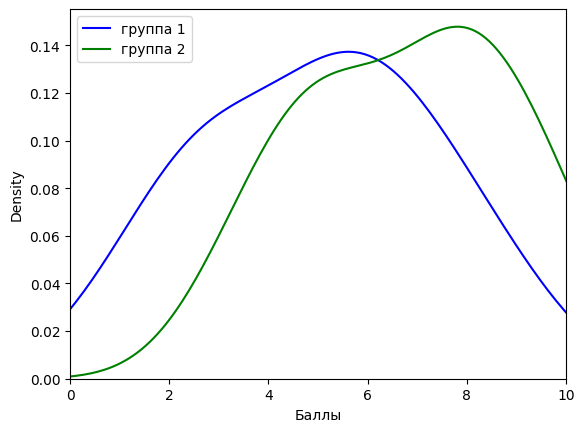

In [41]:
sns.kdeplot(group_1, color='blue', label='группа 1')
sns.kdeplot(group_2, color='green', label='группа 2')

plt.xlim((0, 10))
plt.xlabel('Баллы')
plt.legend();

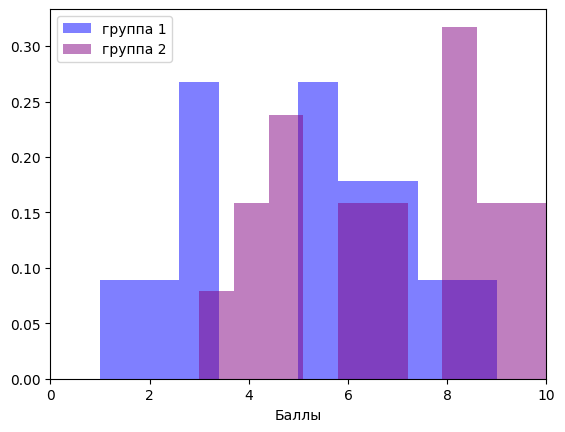

In [42]:
plt.hist(group_1, density=True, color='blue', alpha=0.5, label='группа 1')
plt.hist(group_2, density=True, color='purple', alpha=0.5, label='группа 2')
plt.xlim((0, 10))
plt.xlabel('Баллы')
plt.legend();

H0: средние значение баллов в 1 и 2 группе равны
H1: средние значение баллов в 1 и 2 группе различны

In [43]:
t, p_value = sps.ttest_ind(group_1, group_2)
np.abs(t) > sps.t(df=len(group_1)+len(group_2)-2).ppf(1-0.05/2), p_value 

(True, 0.03281566326837087)

**Вывод:** Мы можем отвергнуть нулевую гипотезу о том, что средние значения двух групп равны. То есть средняя оценка в двух группах не равна.

По графикам можно сделать вывод о том, что во второй группе больше студентов, которые набрали "отлы" за сдачу дз. 

В первой группе большинство студентов получили либо "хор", либо "уд".

## Задача 3

#### Профиль биология


Скачаем [данные](https://www.kaggle.com/ruslankl/mice-protein-expression) об экспрессии генов различных белков в головном мозге белых мышей.

В этом датасете представлены уровни экспрессии 77 белков, измеренные в коре головного мозга 8 классов мышей, некоторые из которых страдают синдромом Дауна, а некоторые были подвержены контекстному обусловливанию страха, задачи, используемой для оценки ассоциативного обучения.

Данные содержат информацию о 38 контрольных мышей и 34 трисомных мышей (синдром Дауна), то есть всего 72 мышки. Проведено 15 измерений каждого белка для каждой мышки, то есть каждой мыши соответствует несколько записей в таблице.

Загрузим данные и посмотрим на начало таблицы. Всего мы имеем 82 колонки, в большинстве их которых содержатся вещественные данные (уровни экспрессии 77 белков). Остальные колонки содержат категориальные данные (с небольшим числом значений).

In [ ]:
path = 'Data_Cortex_Nuclear.csv'
data = pd.read_csv(path)
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


Выведем описательные статистики по вещественным параметрам.

In [ ]:
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


Количество записей по генотипам:

In [ ]:
data.Genotype.value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

В начале исследования полезно посмотреть на данные визуально. Посмотрим на зависимость уровней экспрессии разных белков друг от друга. Визуализируйте данные в первых десяти колонках в двумерных проекциях, используя `sns.pairplot`. 

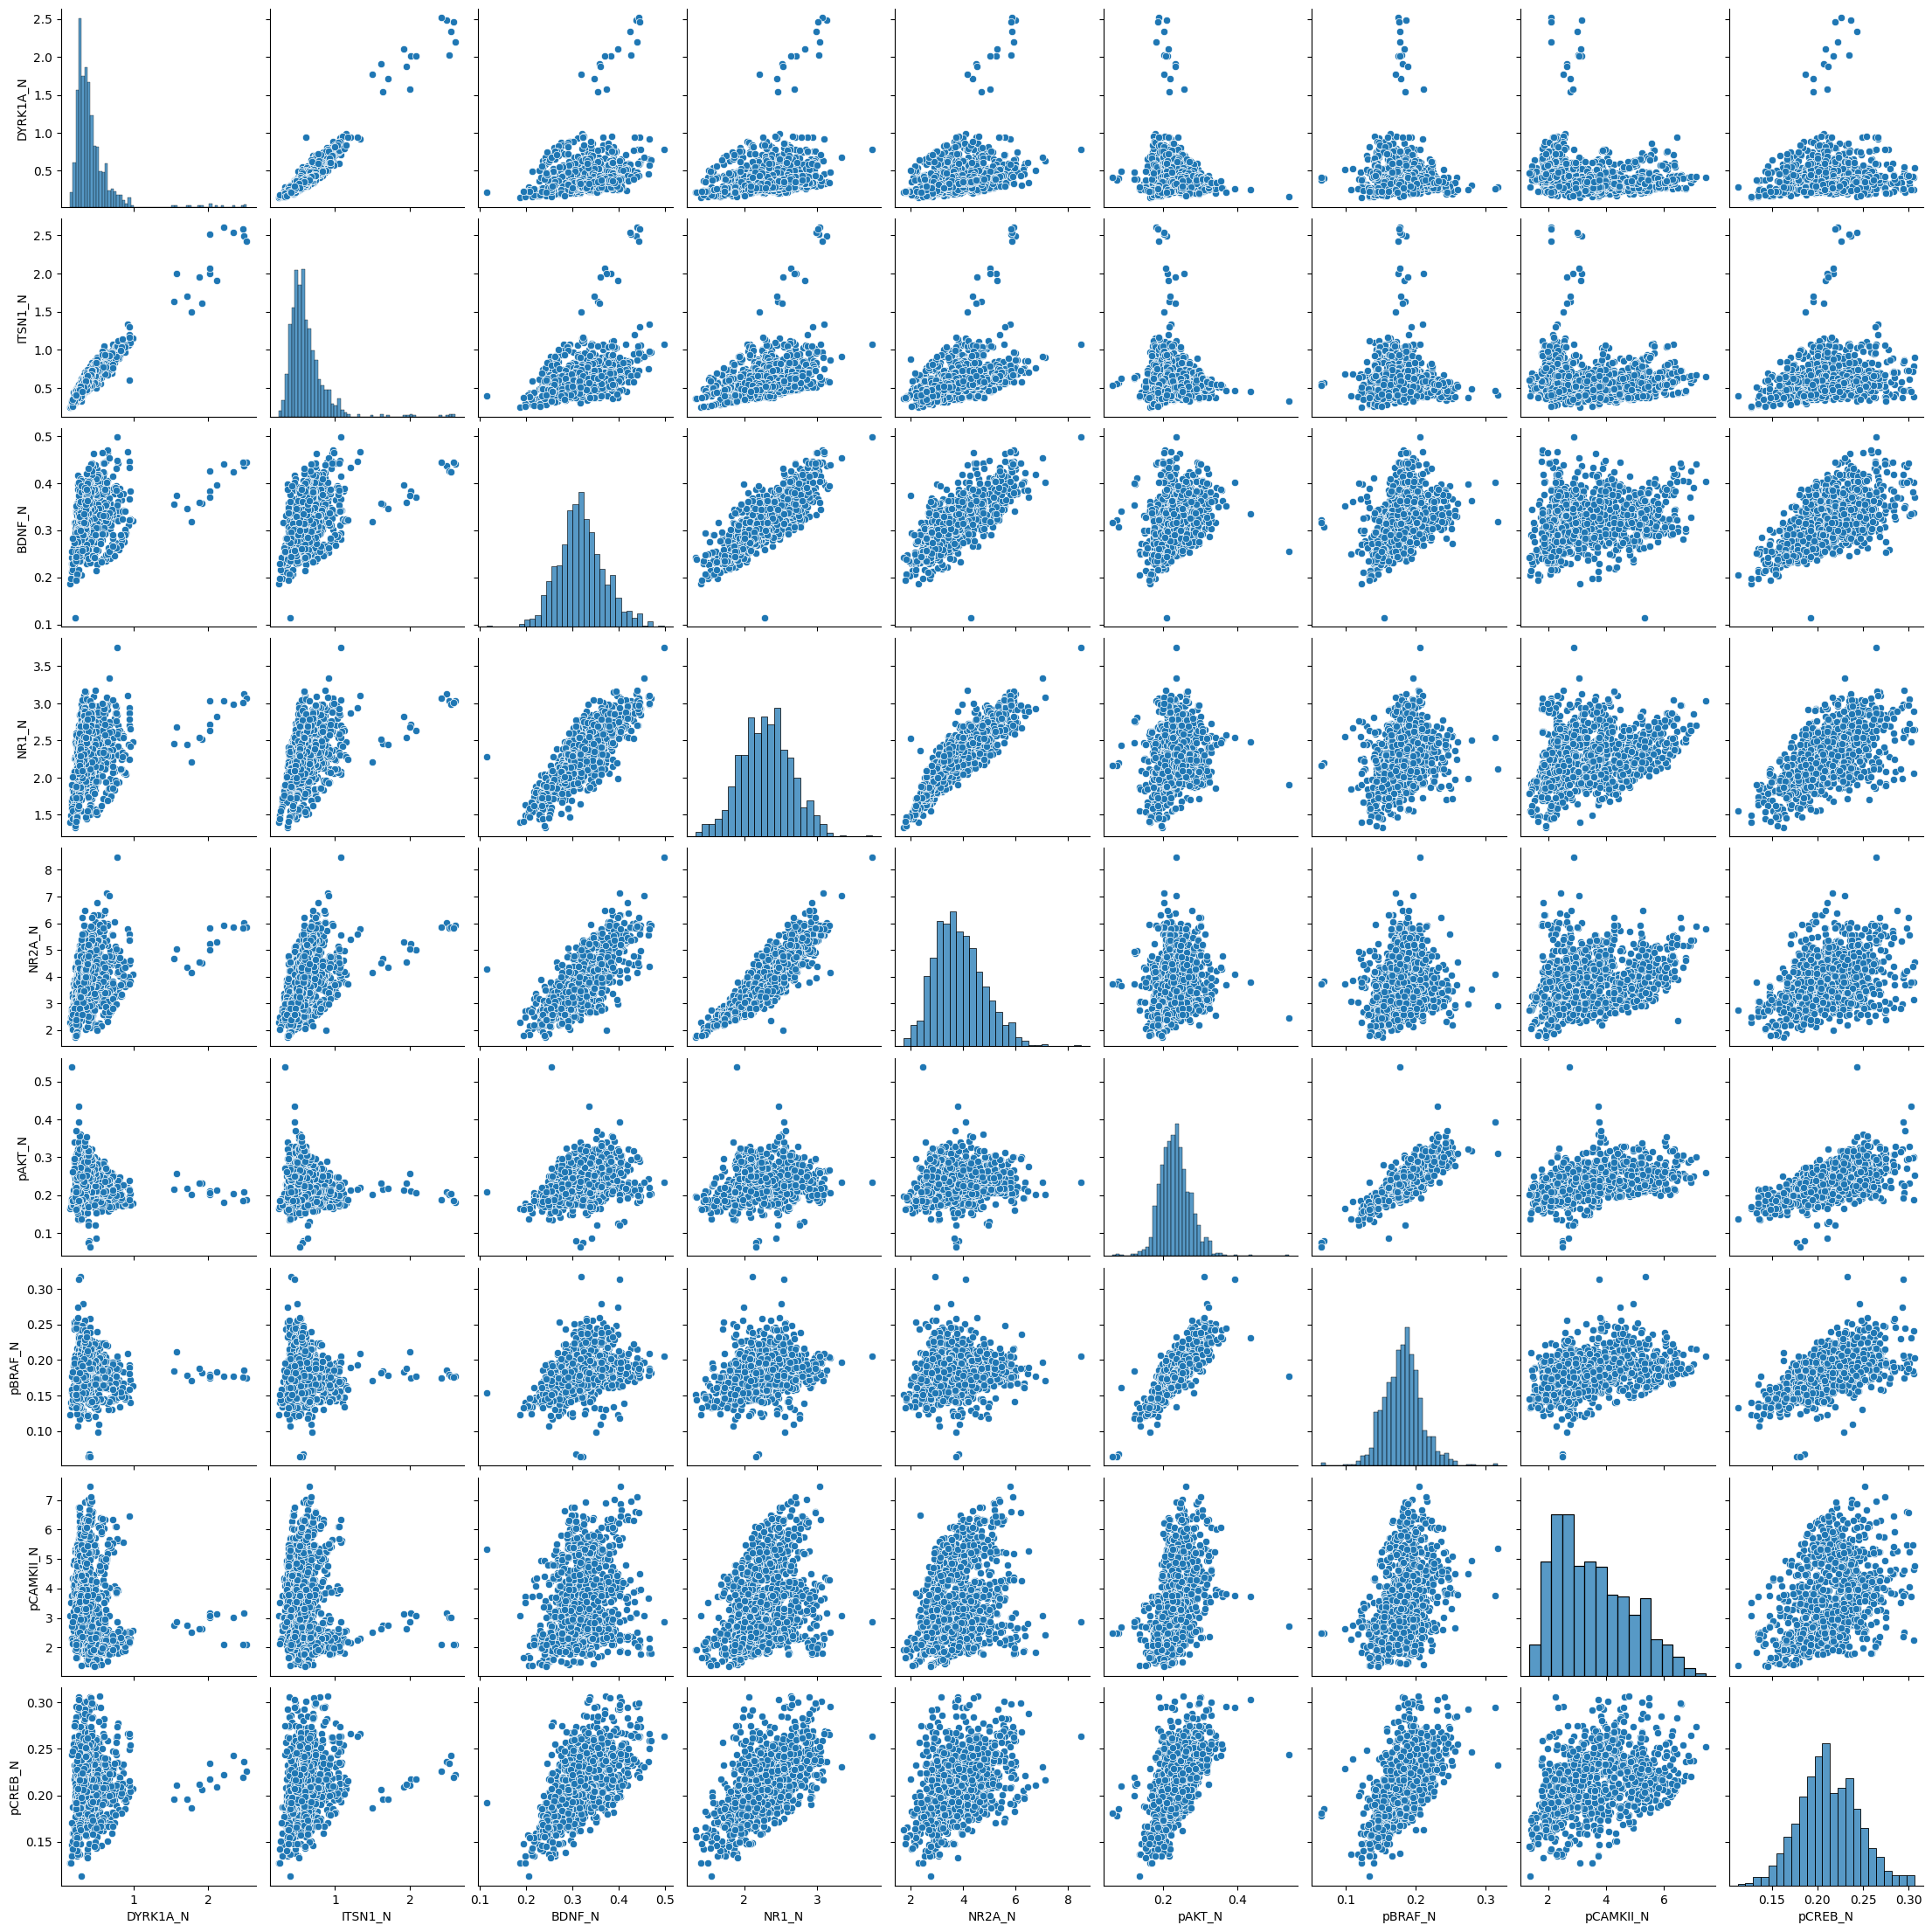

In [ ]:
sns.pairplot(data.iloc[:, :10]);


Как видно из графиков, некоторые белки имеют сильную корреляцию между собой, некоторые нет.

Визуализируйте двумерные проекции данных и гистограммы с использованием `sns.PairGrid` отдельно по генотипам для 10 признаков. Используйте `hue='Genotype'` при вызове `sns.PairGrid`. По параметру `hue`  происходит разделение датасета, подробнее можно почитать в [документации](https://seaborn.pydata.org/generated/seaborn.PairGrid.html). 

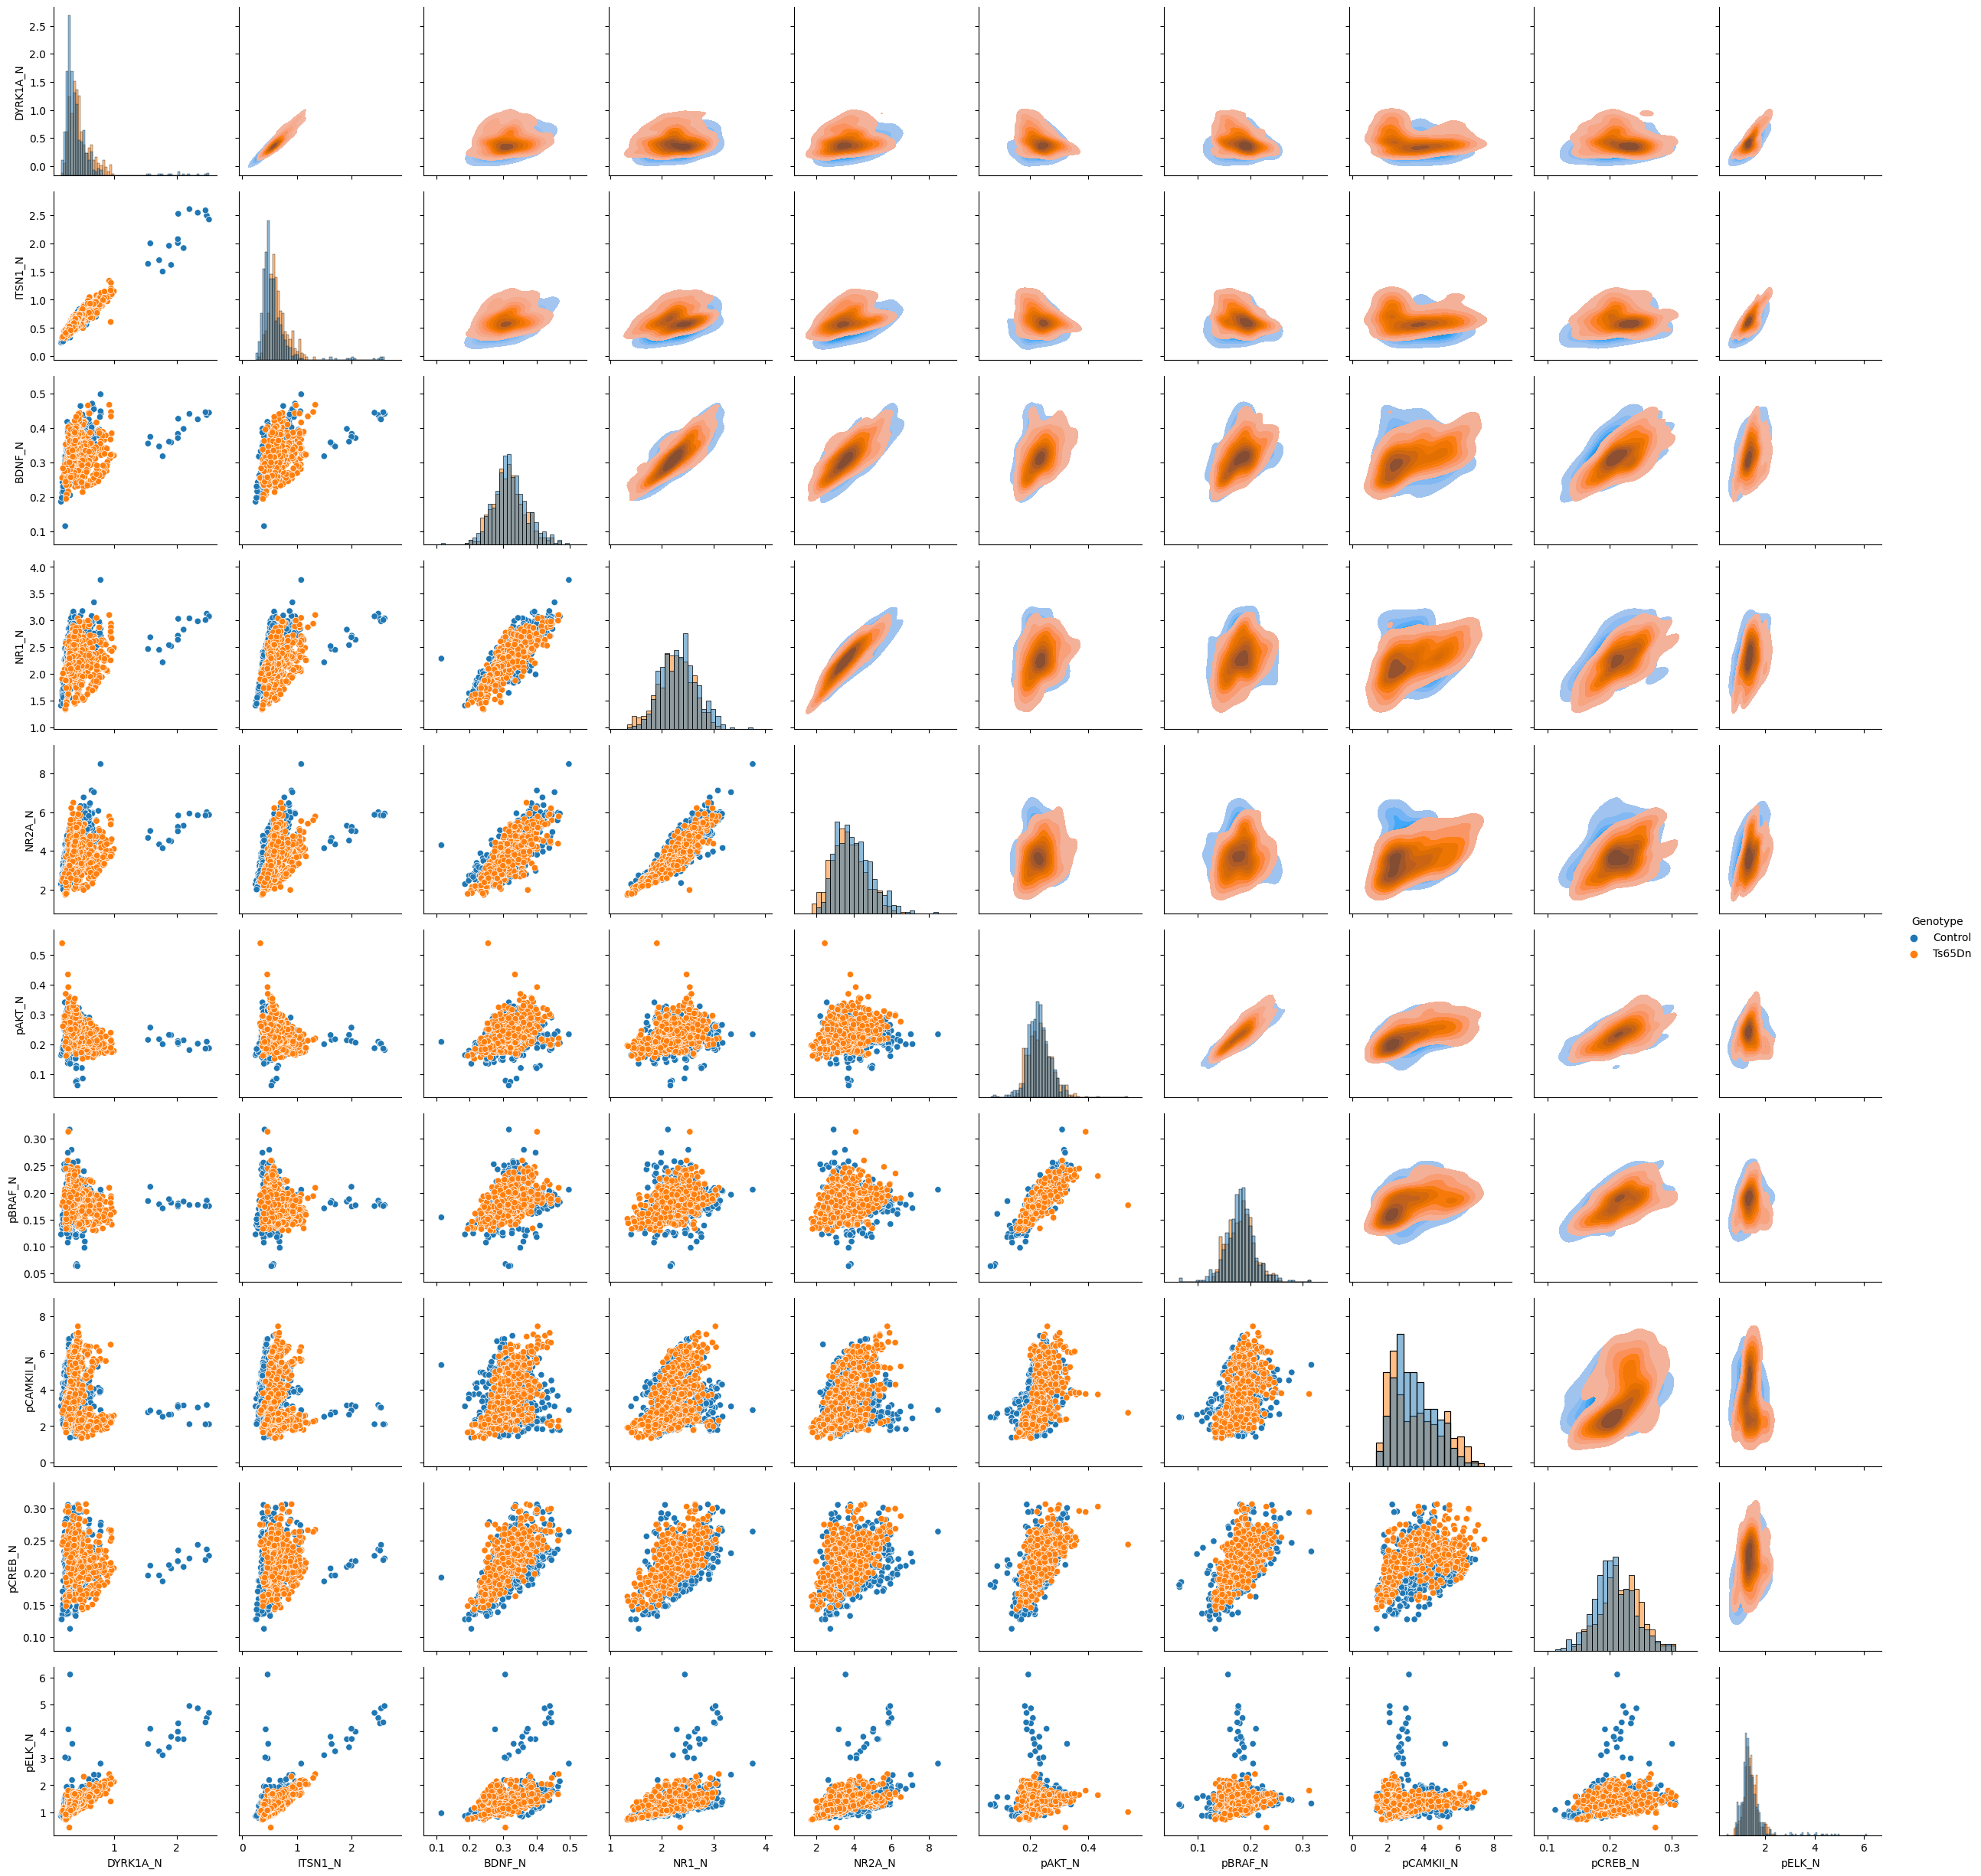

In [ ]:
grid = sns.PairGrid(data=data, hue='Genotype', vars=data.columns[1:11])

grid.map_diag(sns.histplot)
grid.map_upper(sns.kdeplot, fill=True)
grid.map_lower(sns.scatterplot)

grid.add_legend();




##### 1. Зависимость распределения DYRK1A_N от генотипа

Проверьте гипотезу о равенстве средних с использованием критерия Стьюдента.  В реальных исследованиях нужно использовать конкретную альтернативу. 

Сделайте выводы.

Сформулируем гипотезы:


H0: Средние значения белка DYRK1A_N  у контрольной группы и у трисомных мышей равны


Н1: Средние значения белка DYRK1A_N  у контрольной группы и у трисомных мышей отличаются

In [ ]:
dyrk1a_n_data = data[['Genotype', 'DYRK1A_N']].dropna()

trisomic = dyrk1a_n_data[dyrk1a_n_data['Genotype'] == 'Ts65Dn']['DYRK1A_N']
control = dyrk1a_n_data[dyrk1a_n_data['Genotype'] == 'Control']['DYRK1A_N']

t, p_value = sps.ttest_ind(trisomic, control)
print(f't= {(t).round(4)}', 
      f'p-value= {(p_value).round(4)}')

t= 2.9484 p-value= 0.0033


**Вывод**
p-value=0.0033 меньше уровня значимости 0.05. Это значит мы отвергаем нулевую гипотезу и принимаем альтернативную, что средние значение белка DYRK1A_N для двух групп: контрольной и трисомный мышей, разное.

Т.е. можно сделать вывод о том, что генотип оказывает влияние на экспрессию белка DYRK1A_N и его значение мб связано с Синдромом Дауна.





Посчитайте реализацию доверительного интервала величины сдвига. 


In [ ]:
alpha = 0.05
tr_mean = trisomic.mean()
cont_mean = control.mean()

tr_std = trisomic.std()
cont_std = control.std()

n = len(trisomic)
m = len(control)

s = np.sqrt((tr_std ** 2 / n) + (cont_std ** 2 / m))

t_stat = (tr_mean + cont_mean) / s
t_crit = sps.t.ppf(1 - alpha / 2, n + m - 2)

low = tr_mean - cont_mean - t_crit * s
high = tr_mean - cont_mean + t_crit * s
((low).round(5), (high).round(5))

(0.01583, 0.07362)

##### 2. Зависимость распределения  BDNF_N от генотипа


Проверьте гипотезу о равенстве средних с использованием критерия Стьюдента при различных альтернативах, посчитайте оценку сдвига и доверительный интервал. Сделайте выводы. 

Сформулируем гипотезы:


H0: Средние значения белка BDNF_N  у контрольной группы и у трисомных мышей равны


Н1: Средние значения белка BDNF_N  у контрольной группы и у трисомных мышей отличаются

In [ ]:
bdnf_n_data = data[['Genotype', 'BDNF_N']].dropna()

trisomic_b = bdnf_n_data[bdnf_n_data['Genotype'] == 'Ts65Dn']['BDNF_N']
control_b = bdnf_n_data[bdnf_n_data['Genotype'] == 'Control']['BDNF_N']

t, p_value = sps.ttest_ind(trisomic_b, control_b)
print(f't= {(t).round(4)}', 
      f'p-value= {(p_value).round(4)}')

t= -1.4405 p-value= 0.15


In [ ]:
alpha = 0.05
tr_mean = trisomic_b.mean()
cont_mean = control_b.mean()

tr_std = trisomic_b.std()
cont_std = control_b.std()

n = len(trisomic)
m = len(control)

s = np.sqrt((tr_std ** 2 / n) + (cont_std ** 2 / m))

t_stat = (tr_mean + cont_mean) / s
t_crit = sps.t.ppf(1 - alpha / 2, n + m - 2)

low = tr_mean - cont_mean - t_crit * s
high = tr_mean - cont_mean + t_crit * s
((low).round(5), (high).round(5))

(-0.01023, 0.00155)

In [ ]:
d = trisomic_b.mean() - control_b.mean()
print(f'оценка сдвига: {d}')

оценка сдвига: -0.004340429116723776


**Вывод:** 
Оценка слвига отрицательная, то есть это значит, что среднее в группе трисомных мышей меньше, чем в контрольной.

Значение p-value=0.15 это больше уровня значимости 0.05. Это значит, что мы не можем отвергнуть нулевую гипотезу о равенстве среднего значение белка BDNF_N в двух группах,  и результат статистически не значим. 


Также в доверительны интервал входит 0, что тоже говорит о том, что мы не можем отвергнуть нулевую гипотезу.


Т.е. мы не можем утверждать,  генотип оказывает влияние на экспрессию белка BDNF_N и его значение мб связано с Синдромом Дауна.

Как связаны доверительные интервалы с проверкой гипотез? Подтверждается ли это в данном примере?

**Ответ:** Если в доверительный интервал попадает 0, то мы не можем отвергнуть нулевую гипотезу и результат статистически не значим. В данном случае, мы не можем отвергнуть нулевую гипотезу.